In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

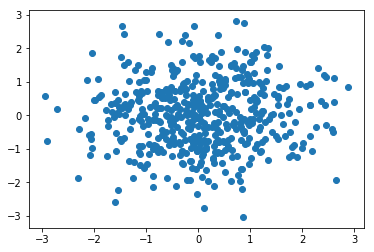

In [3]:
x = np.random.randn(500,2)
ax = plt.subplot(1,1,1)
ax.scatter(x[:,0], x[:,1])

In [4]:
k=3

In [5]:
np.random.seed(101)

In [6]:
centroid=x[np.random.randint(500, size=k),:]

In [7]:
cluster_assign = np.random.randint(k, size=x.shape[0])

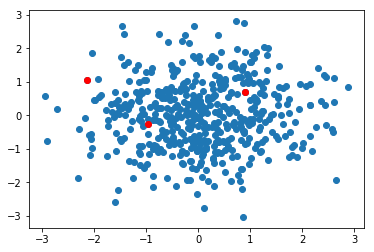

In [8]:
ax = plt.subplot(1,1,1)
ax.scatter(x[:,0], x[:,1])
for i in range(k):
    ax.plot(centroid[i,0], centroid[i,1], "or")

In [9]:
def distance(p, q):
    return pow(sum(pow(p-q, 2)), 0.5)

In [10]:
def update_cluster():
    dist_to_mean = [distance(x[i,:], centroid[0,:]) for i in range(x.shape[0])]
    for j in range(1,k):
        dist_to_mean = np.column_stack((dist_to_mean, [distance(x[i,:], centroid[j,:]) for i in range(x.shape[0])]))
    return np.array([np.argmin(dist_to_mean[i,:]) for i in range(dist_to_mean.shape[0])])

In [11]:
def update_mean():
    centroid_updated = np.zeros(centroid.shape)
    for j in range(max(cluster_assign)+1):
        cluster_assign_ser = pd.Series(cluster_assign)
        temp = x[np.array(cluster_assign_ser[cluster_assign_ser==j].index),:]
        centroid_updated[j,:] = np.array([np.mean(temp[:,i]) for i in range(temp.shape[1])])
    return centroid_updated

In [12]:
def plot_mean():
    ax = plt.subplot(1,1,1)
    ax.scatter(x[:,0], x[:,1])
    for i in range(k):
        ax.plot(centroid[i,0], centroid[i,1], "or")

/Users/williamtjhi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


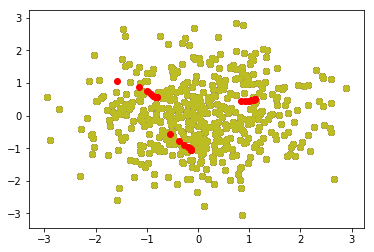

In [13]:
flag = False
counter = 0
while flag==False:
    cluster_assign_new = update_cluster()
    flag = min(cluster_assign_new == cluster_assign)
    cluster_assign = cluster_assign_new
    centroid = update_mean()
    plot_mean()
    counter = counter+1
    if counter==100:
        print("max no. of iterations reached")
        break

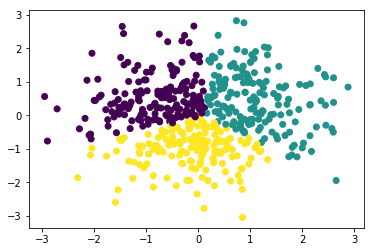

In [14]:
plt.scatter(x[:,0], x[:,1], c=cluster_assign)

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
x = iris.data
k=3
centroid=x[np.random.randint(x.shape[0], size=k),:]
cluster_assign = np.random.randint(k, size=x.shape[0])

In [34]:
flag = False
counter = 0
while flag==False:
    cluster_assign_new = update_cluster()
    flag = min(cluster_assign_new == cluster_assign)
    cluster_assign = cluster_assign_new
    centroid = update_mean()
    #plot_mean()
    counter = counter+1
    if counter==500:
        print("max no. of iterations reached")
        break

In [35]:
pd.DataFrame({'predicted':cluster_assign, 'true':iris.target}).groupby(['predicted', 'true']).size().unstack(fill_value=0)

true,0,1,2
predicted,,,
0,50,0,0
1,0,47,14
2,0,3,36
